AIDS Final Project:  Ford Car Pricing


# Section 1: Data Loading and Initial Cleaning

Steps: 
>
    Load the dataset.
    Identify and address missing values.
    Drop duplicate entries.

Main variable here is using the mean to fill na values. 

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"
data = pd.read_csv(URL)

# Ensure non-numeric columns are explicitly not processed for numerical conversions
numeric_columns = ['mileage', 'mpg', 'tax', 'engineSize', 'price']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Display the first few rows of the dataset
data.head()


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17812 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  object 
 1   year          17812 non-null  int64  
 2   transmission  17812 non-null  object 
 3   mileage       17812 non-null  int64  
 4   fuelType      17812 non-null  object 
 5   tax           17812 non-null  float64
 6   mpg           17812 non-null  float64
 7   engineSize    17812 non-null  float64
 8   price         17812 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.4+ MB


In [17]:
# Check for missing values and duplicate entries
print("Missing values per column:")
print(data.isnull().sum())

print("\nNumber of duplicate entries:", data.duplicated().sum())

Missing values per column:
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             3
mpg             0
engineSize      0
price           0
dtype: int64

Number of duplicate entries: 154


In [18]:
# Handle missing values: Fill numerical columns with mean
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# Handle duplicate entries
data.drop_duplicates(inplace=True)

# Verify the cleaning steps
print("\nDataset shape after cleaning:", data.shape)
data.isnull().sum()


Dataset shape after cleaning: (17812, 9)


model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

Data is now cleaned and ready for EDA.

# Section 2: Exploratory Data Analysis (EDA)

Perform Summary Statistics and Visualizations:
>
    Sales count by fuel type.
    Transmission type price outliers (box plot).
    Regression plot between mpg and price.

In [19]:
# Summary statistics of the dataset
print("\nSummary Statistics:")
print(data.describe())

# Sales count by fuel type
fuel_type_counts = data['fuelType'].value_counts()
print("\nSales count by fuel type:")
print(fuel_type_counts)


Summary Statistics:
               year        mileage           tax           mpg    engineSize  \
count  17812.000000   17812.000000  17812.000000  17812.000000  17812.000000   
mean    2016.862396   23381.146362    113.314731     57.908696      1.350623   
std        2.052039   19419.011045     62.034599     10.132696      0.432581   
min     1996.000000       1.000000      0.000000     20.800000      0.000000   
25%     2016.000000   10000.000000     30.000000     52.300000      1.000000   
50%     2017.000000   18277.000000    145.000000     58.900000      1.200000   
75%     2018.000000   31098.500000    145.000000     65.700000      1.500000   
max     2060.000000  177644.000000    580.000000    201.800000      5.000000   

              price  
count  17812.000000  
mean   12269.556310  
std     4736.285417  
min      495.000000  
25%     8999.000000  
50%    11288.000000  
75%    15295.000000  
max    54995.000000  

Sales count by fuel type:
fuelType
Petrol      12081
Diesel

In [27]:
# Correlation with price
corr_matrix = data.corr(numeric_only=True)
top5_attributes = corr_matrix['price'].abs().sort_values(ascending=False).index[1:6]
print("Top 5 attributes correlated with price:", list(top5_attributes))

Top 5 attributes correlated with price: ['year', 'mileage', 'engineSize', 'tax', 'mpg']



Count of cars by fuelType:
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


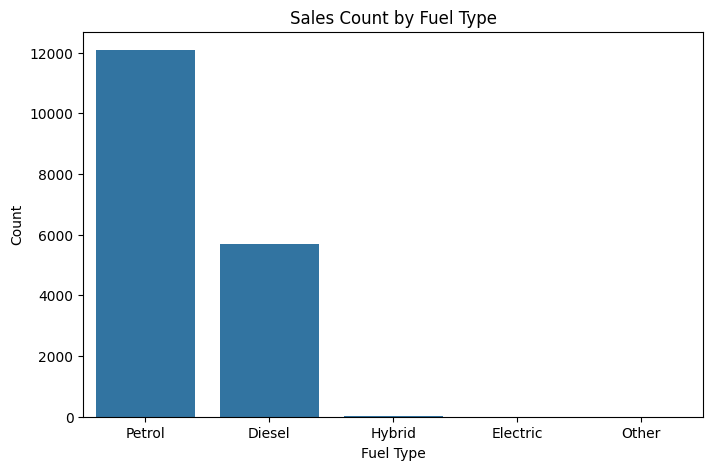

In [31]:
# Count of cars by fuelType
fuel_counts = data['fuelType'].value_counts()
print("\nCount of cars by fuelType:")
print(fuel_counts)

# Plot sales count by fuel type
plt.figure(figsize=(8, 5))
sns.barplot(x=fuel_type_counts.index, y=fuel_type_counts.values)
plt.title("Sales Count by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

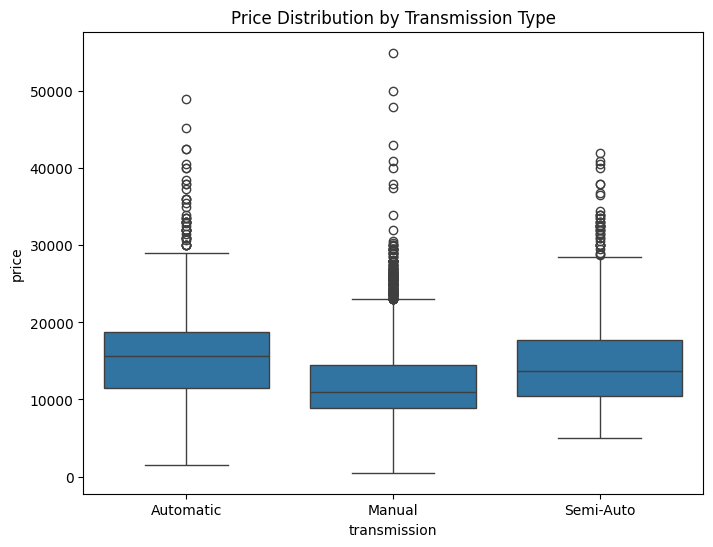

In [30]:
# Box plot for transmission vs price outliers
plt.figure(figsize=(8,6))
sns.boxplot(x='transmission', y='price', data=data)
plt.title("Price Distribution by Transmission Type")
plt.show()

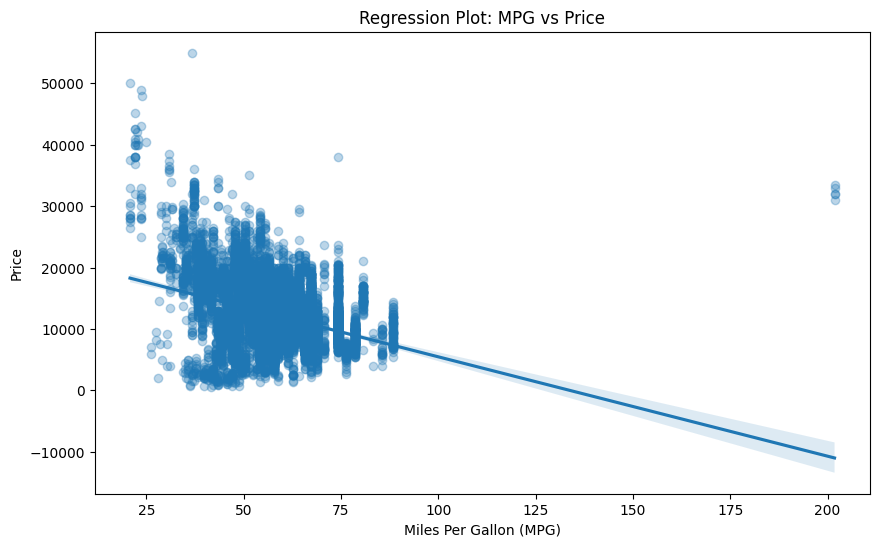

In [35]:
# Regression plot between mpg and price
plt.figure(figsize=(10, 6))
sns.regplot(x='mpg', y='price', data=data, scatter_kws={'alpha': 0.3})
plt.title("Regression Plot: MPG vs Price")
plt.xlabel("Miles Per Gallon (MPG)")
plt.ylabel("Price")
plt.show()

# Section 3: Synthetic Data Creation

    Identify underrepresented categories.
    Generate synthetic data to balance these categories.
    Save the synthetic data as a separate CSV file.

In [36]:
# Code Cell: Synthetic Data Creation

# Identify underrepresented categories by fuelType (arbitrary criteria: say < 5% of total)
threshold = 0.05 * len(data)
underrepresented_fuels = fuel_counts[fuel_counts < threshold].index
print("Underrepresented fuel types:", underrepresented_fuels.tolist())

# Extract subset of data with underrepresented fuel types
under_df = data[data['fuelType'].isin(underrepresented_fuels)]

# Number of synthetic samples to create
num_synthetic = 5000

# For simplicity, we will sample with replacement from under_df and add small random noise
synthetic_data = under_df.sample(n=num_synthetic, replace=True).reset_index(drop=True)

# Add slight variations to numeric columns to simulate new entries
numeric_cols = synthetic_data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    # Adding gaussian noise based on the column std deviation
    col_std = synthetic_data[col].std() if synthetic_data[col].std() > 0 else 1
    noise = np.random.normal(0, col_std*0.05, size=num_synthetic)  # 5% std noise
    synthetic_data[col] = synthetic_data[col] + noise

# Clip values to avoid unrealistic negatives
for col in numeric_cols:
    synthetic_data[col] = synthetic_data[col].clip(lower=0)

# Show a snippet of the synthetic data
display(synthetic_data.head())

# Save synthetic data to CSV
synthetic_data.to_csv("synthetic_data.csv", index=False)

# Save the synthetic data to local path and import os library
import os
path = os.getcwd()
synthetic_data.to_csv(path + "/synthetic_data.csv", index=False)

# Load the synthetic data
synthetic_data = pd.read_csv("synthetic_data.csv")

# Display the first few rows of the synthetic data
synthetic_data.head()

Underrepresented fuel types: ['Hybrid', 'Electric', 'Other']


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Mondeo,2017.032340,Automatic,28003.078535,Hybrid,142.988582,58.564183,2.005768,16893.631931
1,Mondeo,2020.145903,Automatic,3146.324698,Hybrid,138.130834,50.489181,2.007571,25247.948459
2,Kuga,2020.063600,Semi-Auto,5720.005638,Hybrid,130.135035,200.900118,2.510129,32509.178611
3,Mondeo,2016.911039,Automatic,63036.956257,Hybrid,0.301097,67.997899,2.001235,12582.062220
4,Mondeo,2016.065462,Automatic,104495.434513,Hybrid,4.750929,68.639757,1.962706,10104.329937


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Mondeo,2017.032340,Automatic,28003.078535,Hybrid,142.988582,58.564183,2.005768,16893.631931
1,Mondeo,2020.145903,Automatic,3146.324698,Hybrid,138.130834,50.489181,2.007571,25247.948459
2,Kuga,2020.063600,Semi-Auto,5720.005638,Hybrid,130.135035,200.900118,2.510129,32509.178611
3,Mondeo,2016.911039,Automatic,63036.956257,Hybrid,0.301097,67.997899,2.001235,12582.062220
4,Mondeo,2016.065462,Automatic,104495.434513,Hybrid,4.750929,68.639757,1.962706,10104.329937


# Section 4: Modeling and Analysis

Fit and evaluate models:

    Linear Regression (single and multiple variables).
    Polynomial Regression.

In [53]:
# Install the correct package
%pip install scikit-learn

# import train test split
from sklearn.model_selection import train_test_split

# import linear regression
from sklearn.linear_model import LinearRegression

# import mean squared error and r2 score
from sklearn.metrics import mean_squared_error, r2_score

# import pipeline
from sklearn.pipeline import Pipeline

# import standard scaler and polynomial features
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

Note: you may need to restart the kernel to use updated packages.


Regression Modeling Preparations

In [46]:
# Define features and target
target = 'price'
features_single = ['mpg']
features_multiple = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

X_single = data[features_single]
X_multi = data[features_multiple]
y = data[target]

# Train-test split for later steps
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# 1. Linear regression with single feature (mpg)
lin_reg_single = LinearRegression()
lin_reg_single.fit(X_single, y)
y_pred_single = lin_reg_single.predict(X_single)
r2_single = r2_score(y, y_pred_single)
mse_single = mean_squared_error(y, y_pred_single)

print("Single feature (mpg) Linear Regression:")
print("R²:", r2_single)
print("MSE:", mse_single)

Single feature (mpg) Linear Regression:
R²: 0.11989802249624182
MSE: 19741690.80944619


In [47]:
# 2. Linear regression with multiple features
lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_multi, y)
y_pred_multi = lin_reg_multi.predict(X_multi)
r2_multi = r2_score(y, y_pred_multi)
mse_multi = mean_squared_error(y, y_pred_multi)

print("\nMultiple features Linear Regression:")
print("R²:", r2_multi)
print("MSE:", mse_multi)


Multiple features Linear Regression:
R²: 0.7265379654547015
MSE: 6134065.224381709


In [54]:
# 3. Pipeline with StandardScaler, PolynomialFeatures(2), LinearRegression
pipeline_model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linreg', LinearRegression())
])

pipeline_model.fit(X_multi, y)
y_pred_poly = pipeline_model.predict(X_multi)
r2_poly = r2_score(y, y_pred_poly)
mse_poly = mean_squared_error(y, y_pred_poly)

print("\nPolynomial (degree 2) + Linear Regression Pipeline:")
print("R²:", r2_poly)
print("MSE:", mse_poly)


Polynomial (degree 2) + Linear Regression Pipeline:
R²: 0.7666619695239302
MSE: 5234038.065462741


# Section 5: Ridge Regression and Grid Search

Objectives:

    Fit a Ridge regression model with alpha=0.1 on the training set (multiple features). Compute R² on the test set.

    Perform a second order polynomial transform on training and test data, fit a Ridge regression with alpha=0.1, compute R² and MSE on the modified test data.
    
    Perform a Grid Search on Ridge for alpha values {0.01, 0.1, 1, 10, 100} using 4-fold cross validation, identify the optimum alpha.

In [56]:
# import ridge regression
from sklearn.linear_model import Ridge

# import grid search
from sklearn.model_selection import GridSearchCV

# import mean absolute error
from sklearn.metrics import mean_absolute_error

# import mean squared error
from sklearn.metrics import mean_squared_error

In [57]:
# Simple Ridge with alpha=0.1
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train_multi, y_train_multi)
r2_ridge_test = ridge_reg.score(X_test_multi, y_test_multi)

print("Ridge Regression (alpha=0.1) R² on test data:", r2_ridge_test)

# Polynomial transform on train/test
poly_transform = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_transform.fit_transform(X_train_multi)
X_test_poly = poly_transform.transform(X_test_multi)

ridge_reg_poly = Ridge(alpha=0.1)
ridge_reg_poly.fit(X_train_poly, y_train_multi)
y_pred_poly_ridge = ridge_reg_poly.predict(X_test_poly)
r2_poly_ridge = r2_score(y_test_multi, y_pred_poly_ridge)
mse_poly_ridge = mean_squared_error(y_test_multi, y_pred_poly_ridge)

print("\nRidge Regression (alpha=0.1) with Polynomial Features:")
print("R² on test data:", r2_poly_ridge)
print("MSE on test data:", mse_poly_ridge)

# Grid Search for Ridge
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_gs = GridSearchCV(Ridge(), param_grid, cv=4, scoring='r2')
ridge_gs.fit(X_train_multi, y_train_multi)

print("\nGrid Search Best Alpha:", ridge_gs.best_params_['alpha'])
print("Best CV R²:", ridge_gs.best_score_)

Ridge Regression (alpha=0.1) R² on test data: 0.6917134446113116

Ridge Regression (alpha=0.1) with Polynomial Features:
R² on test data: 0.6732748727001794
MSE on test data: 7326174.878080043

Grid Search Best Alpha: 0.01
Best CV R²: 0.7336750903927898


C:\Users\willl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.1777e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


# Section 6: Summary and Recommendations

Objectives:

    Summarize the key findings.
    Provide recommendations on model selection and explainability vs. generalization.
    Discuss final deliverables and next steps.

Model Performance:

    The Ridge Regression (alpha=0.1) on the multiple features (without polynomial expansion) gave an R² of approximately 0.6917 on the test data. This suggests a reasonably strong linear relationship.
    After applying second-degree polynomial features and fitting a Ridge model with alpha=0.1, the R² on the test data was about 0.6733, which is actually a slight decrease compared to the simpler Ridge model. Additionally, the MSE was around 7,326,174.88, indicating the polynomial expansion may not have improved predictive performance in this scenario.
    The Grid Search over various alpha values identified alpha=0.01 as the best parameter, yielding a best cross-validated R² score of approximately 0.7337. This suggests that reducing the regularization strength slightly improved the model’s fit during cross-validation.

Numerical Stability:

    A warning (LinAlgWarning) regarding an ill-conditioned matrix was observed. This typically indicates multicollinearity or excessively correlated features, which can occur after polynomial expansion. While not critical, it’s a sign that the model might be too complex or that feature engineering (e.g., removing redundant features or applying dimensionality reduction) could improve numerical stability and interpretability.

Interpretation and Recommendations:

    The linear model (Ridge) with a carefully chosen alpha (0.01 from the Grid Search) seems to offer a strong predictive performance and better stability than the polynomial-augmented model in this specific scenario.
    Given the emphasis on explainability, sticking to linear or ridge regression with a well-tuned alpha and possibly fewer, more carefully selected features (to reduce collinearity) may provide a clearer understanding of how each feature impacts price.
    If more complex models are explored, consider regularization techniques, dimensionality reduction, or selectively applying polynomial features to mitigate ill-conditioning and ensure model coefficients remain stable and interpretable.